Presentado por: Mercy Arrobo - Solano Wilmer

Fecha: 13/08/2022

# Importación de librerias necesarias

In [1]:
#Importación de librerías necesarias
import cv2
import numpy as np
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
import shutil
import glob
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import img_to_array, array_to_img, img_to_array, load_img
from  PIL  import Image
from rembg import remove
from sklearn.preprocessing import MinMaxScaler
import h5py
from time import sleep
#para la segunda parte
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
#AlexNet
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
from tensorflow.keras.layers import BatchNormalization

# Cargar el Dataset

In [2]:
"""Declarar y presentar la dirección donde se encuentran las imagenes"""
ruta_imagen = "./PROYECTOIA-U3"
nombre_clases = os.listdir(ruta_imagen )
nombre_clases.sort()
"""Presentando etiquetas"""
print(nombre_clases)

['ArroboMercy', 'LeonardoBorja', 'PauteKevin', 'RivasSelena', 'Solano Wilmer']


# Explique el problema a resolver

Se desea desarrollar un modelo de IA basado en AlexNet, con el fin de identificar a un usuario usando un dataset de imagenes. Los usuarios serán los compañeros de clase, para este caso solo se va a trabajar con 5 de ellos. Con el respectivo procesamiento, el modelo deberá predecir con una imágen a qué compañero se hace referencia. 

# Características del dataset

El dataset que se encuentra en el directorio mencionado se encuentran carpetas de cada estudiante en la cual contiene sus fotos. Las características que se pueden identificar al dataset son:

NombreDelEstudiante= Se refiere al nombre de la carpeta donde se encuentran las imagenes de cada estudiantes.

Foto: Las 3 fotos de cada compañero por carpeta

Número total de fotos inicial: 15

# Procesamiento de imagenes

In [3]:
"""Ciclo for para reocrren el nombre de las etiquetas"""
for nombre_clase in nombre_clases:
    cur_path = ruta_imagen + "/" + nombre_clase
    elements = os.listdir(cur_path)
    """Copiando las imágenes en una nueva carpeta"""
    for element in elements:
        print("Copiando imagen - {} in PROYECTOIA-U3_Aumento/{}".format(element, nombre_clase))
        src = os.path.join(ruta_imagen  + "/" + nombre_clase, element) # origen
        dst = os.path.join("./PROYECTOIA-U3_Aumento/" + nombre_clase, element) 
        shutil.copy(src, dst)

Copiando imagen - L00385770_1.png in PROYECTOIA-U3_Aumento/ArroboMercy
Copiando imagen - L00385770_2.png in PROYECTOIA-U3_Aumento/ArroboMercy
Copiando imagen - L00385770_3.png in PROYECTOIA-U3_Aumento/ArroboMercy
Copiando imagen - L00393007_1.png in PROYECTOIA-U3_Aumento/LeonardoBorja
Copiando imagen - L00393007_2.png in PROYECTOIA-U3_Aumento/LeonardoBorja
Copiando imagen - L00393007_3.png in PROYECTOIA-U3_Aumento/LeonardoBorja
Copiando imagen - L00080134_1.jpg in PROYECTOIA-U3_Aumento/PauteKevin
Copiando imagen - L00080134_2.jpg in PROYECTOIA-U3_Aumento/PauteKevin
Copiando imagen - L00080134_3.jpg in PROYECTOIA-U3_Aumento/PauteKevin
Copiando imagen - L00376689_1.png in PROYECTOIA-U3_Aumento/RivasSelena
Copiando imagen - L00376689_2.png in PROYECTOIA-U3_Aumento/RivasSelena
Copiando imagen - L00376689_3.png in PROYECTOIA-U3_Aumento/RivasSelena
Copiando imagen - L00392980_1.png in PROYECTOIA-U3_Aumento/Solano Wilmer
Copiando imagen - L00392980_2.png in PROYECTOIA-U3_Aumento/Solano Wilmer

# Evaluación del Modelo

In [4]:
"""Generando imagenes nuevas"""
datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.4,
        horizontal_flip=True,
        fill_mode='nearest')

# Arrobo Mercy

In [5]:
"""Creando imágenes para la carpeta de Mercy"""
os.chdir(r"C:\Users\wilme\Laboratorio1_U3\PROYECTOIA-U3_Aumento\ArroboMercy")
for path in os.listdir():
    img = load_img(f"{path}")
    x = img_to_array(img)    
    x = x.reshape((1,) + x.shape)
    i = 0
    for batch in datagen.flow(x, batch_size=1,
            save_to_dir=".", 
            save_prefix= 'ArroboMercy', 
            save_format='png'):
        i += 1
        if i == 9:    
            break 

# Leonardo Borja

In [6]:
"""Creando imágenes para la carpeta de Borja"""
os.chdir(r"C:\Users\wilme\Laboratorio1_U3\PROYECTOIA-U3_Aumento\LeonardoBorja")
for path in os.listdir():
    img = load_img(f"{path}")
    x = img_to_array(img)    
    x = x.reshape((1,) + x.shape)
    i = 0
    for batch in datagen.flow(x, batch_size=1,
            save_to_dir=".",  
            save_prefix= 'LeonardoBorja', 
            save_format='png'):
        i += 1
        if i == 9:     
            break 

# Paute Kevin

In [7]:
"""Creando imágenes para la carpeta de Paute"""
os.chdir(r"C:\Users\wilme\Laboratorio1_U3\PROYECTOIA-U3_Aumento\PauteKevin")
for path in os.listdir():
    img = load_img(f"{path}")
    x = img_to_array(img)    
    x = x.reshape((1,) + x.shape)
    i = 0
    for batch in datagen.flow(x, batch_size=1,
            save_to_dir=".",   
            save_prefix= 'PauteKevin', 
            save_format='png'):
        i += 1
        if i == 9:     
            break 

# RivasSelena

In [8]:
"""Creando imágenes para la carpeta de Rivas"""
os.chdir(r"C:\Users\wilme\Laboratorio1_U3\PROYECTOIA-U3_Aumento\RivasSelena")
for path in os.listdir():
    img = load_img(f"{path}")
    x = img_to_array(img)    
    x = x.reshape((1,) + x.shape)
    i = 0
    for batch in datagen.flow(x, batch_size=1,
            save_to_dir=".",   
            save_prefix= 'RivasSelena', 
            save_format='png'):
        i += 1
        if i == 9:     
            break 

# Solano Wilmer

In [9]:
"""Creando imágenes para la carpeta de Solano"""
os.chdir(r"C:\Users\wilme\Laboratorio1_U3\PROYECTOIA-U3_Aumento\Solano Wilmer")
for path in os.listdir():
    img = load_img(f"{path}")
    x = img_to_array(img)    
    x = x.reshape((1,) + x.shape)
    i = 0
    for batch in datagen.flow(x, batch_size=1,
            save_to_dir=".",   
            save_prefix= 'Solano Wilmer', 
            save_format='png'):
        i += 1
        if i == 9:     
            break

# Filtro NLM para eliminación de ruido de imágenes

In [10]:
"""Obteniendo etiquetas de la nueva carpeta que se ha creado"""
os.chdir(r"C:\Users\wilme\Laboratorio1_U3")
ruta_imagen = "./PROYECTOIA-U3_Aumento"
nombre_clases = os.listdir(ruta_imagen)
nombre_clases.sort()
print(nombre_clases)

['ArroboMercy', 'LeonardoBorja', 'PauteKevin', 'RivasSelena', 'Solano Wilmer']


In [11]:
"""Recorriendo la ruta y el nombre de cada carpeta"""
for nombre_clase in nombre_clases:
    cur_path = ruta_imagen + "/" + nombre_clase
    cur_label = nombre_clase
    i = 1
    """Ciclo for para que se elimine el ruido de cada imágen"""
    for file in glob.glob(cur_path + "/*"):
        print("Imagen de procesamiento - {} in {}".format(i, cur_label))
        # leer la ruta de las imágenes
        image = cv2.imread(file)
        # Imágenes de denoising
        dst = cv2.fastNlMeansDenoisingColored(image,None,10,10,7,21)
        b,g,r = cv2.split(dst)
        rgb_dst = cv2.merge([r,g,b])
        # guardando imágenes
        save_path = './PROYECTOIA-U3_eliminarRuido/'+ cur_label
        cv2.imwrite(os.path.join(save_path , cur_label + '_' + str(i) + '.png'),
                    cv2.cvtColor(rgb_dst,cv2.COLOR_RGB2BGR))
        
        # mostrar actualización de bucle
        i += 1

Imagen de procesamiento - 1 in ArroboMercy
Imagen de procesamiento - 2 in ArroboMercy
Imagen de procesamiento - 3 in ArroboMercy
Imagen de procesamiento - 4 in ArroboMercy
Imagen de procesamiento - 5 in ArroboMercy
Imagen de procesamiento - 6 in ArroboMercy
Imagen de procesamiento - 7 in ArroboMercy
Imagen de procesamiento - 8 in ArroboMercy
Imagen de procesamiento - 9 in ArroboMercy
Imagen de procesamiento - 10 in ArroboMercy
Imagen de procesamiento - 11 in ArroboMercy
Imagen de procesamiento - 12 in ArroboMercy
Imagen de procesamiento - 13 in ArroboMercy
Imagen de procesamiento - 14 in ArroboMercy
Imagen de procesamiento - 15 in ArroboMercy
Imagen de procesamiento - 16 in ArroboMercy
Imagen de procesamiento - 17 in ArroboMercy
Imagen de procesamiento - 18 in ArroboMercy
Imagen de procesamiento - 19 in ArroboMercy
Imagen de procesamiento - 20 in ArroboMercy
Imagen de procesamiento - 21 in ArroboMercy
Imagen de procesamiento - 22 in ArroboMercy
Imagen de procesamiento - 23 in ArroboMer

# Eliminación de fondo

In [12]:
"""Obteniendo etiquetas de la nueva carpeta que se ha creado"""
ruta_imagen = "./PROYECTOIA-U3_eliminarRuido"
nombre_clases = os.listdir(ruta_imagen)
nombre_clases.sort()
print(nombre_clases)

['ArroboMercy', 'LeonardoBorja', 'PauteKevin', 'RivasSelena', 'Solano Wilmer']


In [13]:
"""Recorriendo la ruta y el nombre de cada carpeta"""
for nombre_clase in nombre_clases:
    cur_path = ruta_imagen + "/" + nombre_clase
    cur_label = nombre_clase
    i = 1
    """Ciclo for para que se elimine el ruido de cada imágen"""
    for file in glob.glob(cur_path + "/*"):
        print("Imágen de procesamiento - {} in {}".format(i, cur_label))
        # leer la ruta de las imágenes
        image = cv2.imread(file)
        # removiendo bg 
        output = remove(image)
        # guardando imágenes
        save_path = './PROYECTOIA-U3_eliminarBG/'+ cur_label
        cv2.imwrite(os.path.join(save_path , cur_label + '_' + str(i) + '.png'), output)
        

        # mostrar actualización de bucle
        i += 1

Imágen de procesamiento - 1 in ArroboMercy
Imágen de procesamiento - 2 in ArroboMercy
Imágen de procesamiento - 3 in ArroboMercy
Imágen de procesamiento - 4 in ArroboMercy
Imágen de procesamiento - 5 in ArroboMercy
Imágen de procesamiento - 6 in ArroboMercy
Imágen de procesamiento - 7 in ArroboMercy
Imágen de procesamiento - 8 in ArroboMercy
Imágen de procesamiento - 9 in ArroboMercy
Imágen de procesamiento - 10 in ArroboMercy
Imágen de procesamiento - 11 in ArroboMercy
Imágen de procesamiento - 12 in ArroboMercy
Imágen de procesamiento - 13 in ArroboMercy
Imágen de procesamiento - 14 in ArroboMercy
Imágen de procesamiento - 15 in ArroboMercy
Imágen de procesamiento - 16 in ArroboMercy
Imágen de procesamiento - 17 in ArroboMercy
Imágen de procesamiento - 18 in ArroboMercy
Imágen de procesamiento - 19 in ArroboMercy
Imágen de procesamiento - 20 in ArroboMercy
Imágen de procesamiento - 21 in ArroboMercy
Imágen de procesamiento - 22 in ArroboMercy
Imágen de procesamiento - 23 in ArroboMer

# Carga y exploración de datos

In [37]:
"""Dirección de donde se encuentran las imágenes con las que se va a trabajar"""
fpath = './PROYECTOIA-U3_eliminarBG'
random_seed = 9
"""Imprimiendo el nombre de las categorías y el número"""
categories = os.listdir(fpath)
print("Listar las categorías = ",categories,"\n\nNúmero de categorías = ", len(categories))

Listar las categorías =  ['ArroboMercy', 'LeonardoBorja', 'PauteKevin', 'RivasSelena', 'Solano Wilmer'] 

Número de categorías =  5


In [38]:
"""Función para cargas las imágenes y etiquetas que recibe las categorías"""
def load_images_and_labels(categories):
    img_lst=[]
    labels=[]
    for index, category in enumerate(categories):
        for image_name in os.listdir(fpath+"/"+category):
            """Características de las imágenes"""
            IMAGE_SIZE=(192,192)
            img = cv2.imread(fpath+"/"+category+"/"+image_name)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            img=cv2.resize(img,IMAGE_SIZE)
            
            """Creando array de imágenes"""
            img_array = Image.fromarray(img, 'RGB')
            
            img_lst.append(np.array(img_array))
            
            labels.append(index)
    return img_lst, labels

images, labels = load_images_and_labels(categories)
"""Presentando el número de etiquetas e imágenes que han sido cargadas"""
print("No. de imagenes cargadas = ",len(images),"\nNo. de etiquetas cargadas = ",len(labels))
print(type(images),type(labels))

No. de imagenes cargadas =  135 
No. de etiquetas cargadas =  135
<class 'list'> <class 'list'>


In [39]:
"""Imagenes y etiquetas"""
images = np.array(images)
labels = np.array(labels)

print("Figura imagenes = ",images.shape,"\nFigura etiquetas = ",labels.shape)
print(type(images),type(labels))

Figura imagenes =  (135, 192, 192, 3) 
Figura etiquetas =  (135,)
<class 'numpy.ndarray'> <class 'numpy.ndarray'>


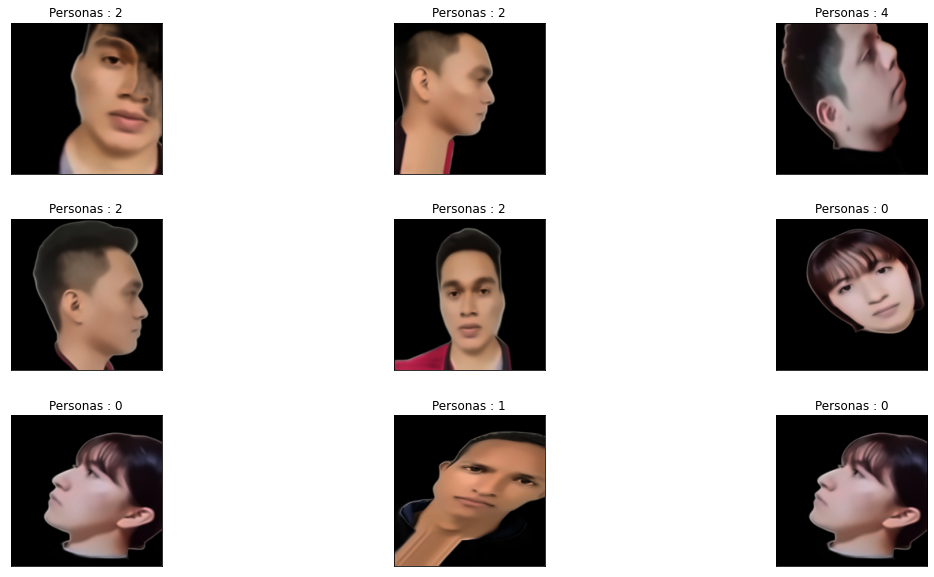

In [40]:
"""Función para mostrar imágenes aleatorias que recieben las etiquetas e imágenes"""
def display_rand_images(images, labels):
    plt.figure(1 , figsize = (19 , 10))
    n = 0 
    for i in range(9):
        n += 1 
        r = np.random.randint(0 , images.shape[0] , 1)
        
        plt.subplot(3 , 3 , n)
        plt.subplots_adjust(hspace = 0.3 , wspace = 0.3)
        plt.imshow(images[r[0]])
        
        plt.title('Personas : {}'.format(labels[r[0]]))
        plt.xticks([])
        plt.yticks([])
        
    plt.show()
    
display_rand_images(images, labels)

# Preparar datos para entrenar el modelo CNN

In [41]:
#1-paso en el barajado de datos

#obtener números igualmente espaciados en un rango dado
n = np.arange(images.shape[0])
print("'n' valores antes de barajar = ",n)

#mezclar todos los valores igualmente espaciados en la lista 'n'
np.random.seed(random_seed)
np.random.shuffle(n)
print("\n'n' valores despues de barajar= ",n)

'n' valores antes de barajar =  [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134]

'n' valores despues de barajar=  [  8  45  68   3  26 115  47  10 124  72  73  53  90  96  31  69  67  25
  20  51  44 112  21  35  28  70  39  43  84  23 107   6  66  78  98 105
  55  27   7  79 100  14 108  36  75  76  32  17  85 104 109  57  42  41
  71  61 129  83  29   2  38  46  95  48  15  34 102  64  87  82  30  97
  24   5  81  16  94 111 116  89 127   4 130  50 128 121  54  77 119  58
 123  13  63  49 101

In [42]:
#2-paso en el barajado de datos

#barajar las imágenes y los datos de las etiquetas correspondientes en ambas listas
images = images[n]
labels = labels[n]

print("Forma de las imagenes despues de barajar = ",images.shape,"\nEtiquetas despues de barajar = ",labels.shape)

Forma de las imagenes despues de barajar =  (135, 192, 192, 3) 
Etiquetas despues de barajar =  (135,)


In [43]:
"""Forma de imágenes"""
images = images.astype(np.float32)
labels = labels.astype(np.int32)
images = images/255
print("Forma de las imágenes después de la normalización = ",images.shape)

Forma de las imágenes después de la normalización =  (135, 192, 192, 3)


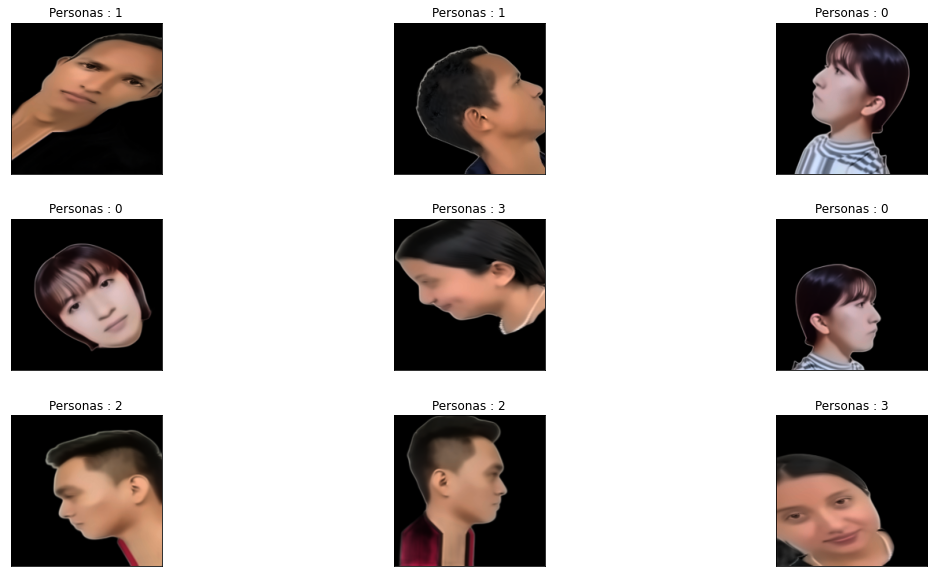

In [44]:
display_rand_images(images, labels)

# División del dataset en datos de entrenamiento y datos de test

In [45]:
"""Variables de entrenamiento y prueba"""
train_ds, test_ds, train_labels, test_labels = train_test_split(images, labels, test_size = 0.2, random_state = random_seed)

print("enternamiento_ds forma = ",train_ds.shape)
print("entrenamiento_etiqueta forma = ",train_labels.shape)
print("\nprueba_ds forma = ",test_ds.shape)
print("prueba_etiqueta forma = ",test_labels.shape)

enternamiento_ds forma =  (108, 192, 192, 3)
entrenamiento_etiqueta forma =  (108,)

prueba_ds forma =  (27, 192, 192, 3)
prueba_etiqueta forma =  (27,)


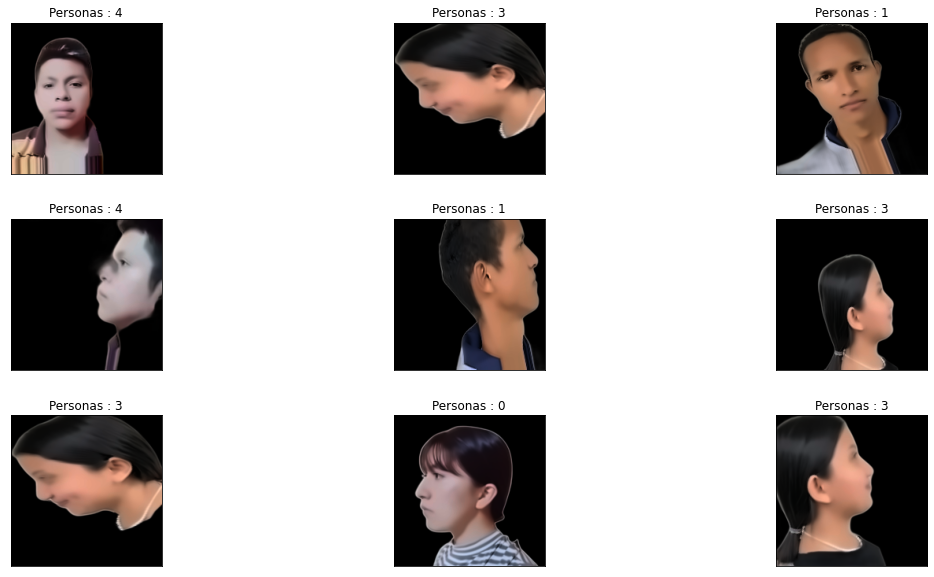

In [46]:
display_rand_images(train_ds, train_labels)

In [47]:
"""definiendo tamaño de imágenes para evitar errores al ejecutar el modelo"""
train_ds = tf.image.resize(train_ds, (227, 227))
test_ds = tf.image.resize(test_ds, (227, 227)) #AQUI ESTABAN 150

# Definir el modelo CNN de AlexNet

In [48]:
"""Definir todas las capas del modelo de AlexNet"""
model=Sequential()

#1 capa de conversión
model.add(Conv2D(filters=96,kernel_size=(11,11),strides=(4,4),padding="valid",activation="relu",input_shape=(227,227,3)))

#1 capa máxima de la piscina
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))

model.add(BatchNormalization())

#2 capa de conversión
model.add(Conv2D(filters=256,kernel_size=(5,5),strides=(1,1),padding="valid",activation="relu"))

#2 capa máxima de la piscina
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))

model.add(BatchNormalization())

#3 capa de conversión
model.add(Conv2D(filters=384,kernel_size=(3,3),strides=(1,1),padding="valid",activation="relu"))

#4 capa de conversión
model.add(Conv2D(filters=384,kernel_size=(3,3),strides=(1,1),padding="valid",activation="relu"))

#5 capa de conversión
model.add(Conv2D(filters=256,kernel_size=(3,3),strides=(1,1),padding="valid",activation="relu"))

#3 capa máxima de la piscina
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))

model.add(BatchNormalization())


model.add(Flatten())

#1 capa densa
model.add(Dense(4096,input_shape=(227,227,3),activation="relu"))

model.add(Dropout(0.4))

model.add(BatchNormalization())

#2 capa densa
model.add(Dense(4096,activation="relu"))

model.add(Dropout(0.4))

model.add(BatchNormalization())

#3 capa densa
model.add(Dense(1000,activation="relu"))

model.add(Dropout(0.4))

model.add(BatchNormalization())

#capa de salida
model.add(Dense(20,activation="softmax"))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 55, 55, 96)        34944     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 27, 27, 96)       0         
 2D)                                                             
                                                                 
 batch_normalization_8 (Batc  (None, 27, 27, 96)       384       
 hNormalization)                                                 
                                                                 
 conv2d_11 (Conv2D)          (None, 23, 23, 256)       614656    
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 11, 11, 256)      0         
 2D)                                                             
                                                      

In [49]:
"""Compilar el modelo CNN"""
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [50]:
"""Usando EarlyStopping para mayor acurrancy"""
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=200)

In [53]:
"""Ajustando el modelo usando los datos de entrenamiento"""
model.fit(train_ds,
          train_labels,
          epochs=100)

Epoch 1/100
4/4 [==============================] - 36s 4s/step - loss: 0.1224 - accuracy: 0.9537
Epoch 2/100
4/4 [==============================] - 17s 4s/step - loss: 0.2967 - accuracy: 0.9444
Epoch 3/100
4/4 [==============================] - 16s 4s/step - loss: 0.4487 - accuracy: 0.8611
Epoch 4/100
4/4 [==============================] - 16s 4s/step - loss: 0.4639 - accuracy: 0.8611
Epoch 5/100
4/4 [==============================] - 13s 3s/step - loss: 0.1861 - accuracy: 0.9444
Epoch 6/100
4/4 [==============================] - 14s 3s/step - loss: 0.1193 - accuracy: 0.9537
Epoch 7/100
4/4 [==============================] - 13s 3s/step - loss: 0.0884 - accuracy: 0.9630
Epoch 8/100
4/4 [==============================] - 14s 3s/step - loss: 0.1507 - accuracy: 0.9444
Epoch 9/100
4/4 [==============================] - 13s 3s/step - loss: 0.1006 - accuracy: 0.9537
Epoch 10/100
4/4 [==============================] - 15s 4s/step - loss: 0.1122 - accuracy: 0.9630
Epoch 11/100
4/4 [===========

4/4 [==============================] - 18s 4s/step - loss: 0.0156 - accuracy: 1.0000
Epoch 85/100
4/4 [==============================] - 16s 4s/step - loss: 0.2293 - accuracy: 0.9444
Epoch 86/100
4/4 [==============================] - 17s 4s/step - loss: 0.0169 - accuracy: 1.0000
Epoch 87/100
4/4 [==============================] - 22s 5s/step - loss: 0.1322 - accuracy: 0.9722
Epoch 88/100
4/4 [==============================] - 20s 4s/step - loss: 0.0908 - accuracy: 0.9722
Epoch 89/100
4/4 [==============================] - 18s 4s/step - loss: 0.0315 - accuracy: 0.9907
Epoch 90/100
4/4 [==============================] - 15s 3s/step - loss: 0.1162 - accuracy: 0.9722
Epoch 91/100
4/4 [==============================] - 20s 5s/step - loss: 0.0843 - accuracy: 0.9815
Epoch 92/100
4/4 [==============================] - 22s 5s/step - loss: 0.0368 - accuracy: 0.9815
Epoch 93/100
4/4 [==============================] - 21s 5s/step - loss: 0.1137 - accuracy: 0.9630
Epoch 94/100
4/4 [===============

In [54]:
"""Métricas para evaluar la precisión y la pérdida en el conjunto de datos de prueba"""
loss, accuracy = model.evaluate(test_ds, test_labels)

print(loss,accuracy)

1/1 [==============================] - 6s 6s/step - loss: 1.2489 - accuracy: 0.8148
1.2488960027694702 0.8148148059844971


# Predecir valores usando el modelo entrenado

In [55]:
"""Declarando variable para predecir"""
pred = model.predict(test_ds)

pred.shape

1/1 [==============================] - 11s 11s/step


(27, 20)

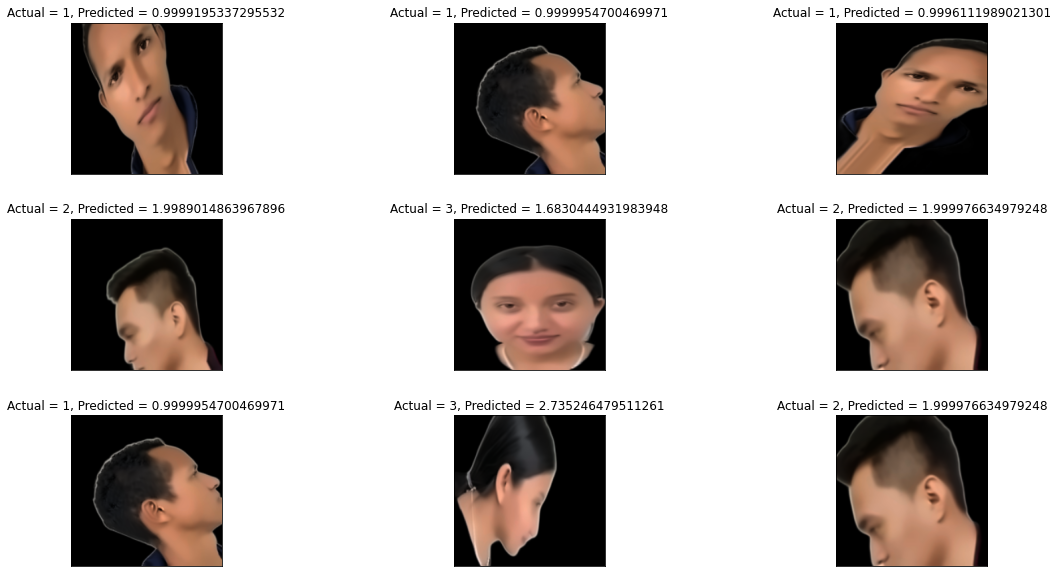

In [57]:
"""Declarando tamaño para las figuras"""
plt.figure(1 , figsize = (19 , 10))
n = 0 
"""Recorriendo 9 fotos aleatorias"""
for i in range(9):
    n += 1 
    r = np.random.randint( 0, test_ds.shape[0], 1)
    
    plt.subplot(3, 3, n)
    plt.subplots_adjust(hspace = 0.3, wspace = 0.3)
    
    plt.imshow(test_ds[r[0]])
    plt.title('Actual = {}, Predicted = {}'.format(test_labels[r[0]] , test_labels[r[0]]*pred[r[0]][test_labels[r[0]]]) )
    plt.xticks([]) , plt.yticks([])

plt.show()